<a href="https://colab.research.google.com/github/chiss7/nxor-tensorflow/blob/main/NXOR2/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/MyDrive/Colab Notebooks/NXOR 2 - Tensorflow 2 (no keras) /utils.py' '/content'
!cp '/content/drive/MyDrive/Colab Notebooks/NXOR 2 - Tensorflow 2 (no keras) /optimizers.py' '/content'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils import Model
from optimizers import GradientDescent, Momentum, Adam

# Refreshing import to changes in utils.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# IMPORT DATA
x = np.array([(0, 0), (0, 1), (1, 0), (1, 1)], dtype=np.float32)
y = np.array([[1], [0], [0], [1]], dtype=np.float32)

In [ ]:
# (training examples, features)
x.shape

(4, 2)

In [ ]:
# HYPER PARAMETERS
lr = 1e-3
arch = [20, 10, 5]
num_epochs = 1000

model = Model(arch)
optimizer = Adam(learning_rate=lr)
#new_bin_cross_entropy = tf.keras.losses.BinaryCrossentropy()

loss_list = []
accuracy_list = []

print("----------------------------------------")
print(model.title)
print(optimizer.title)
print("----------------------------------------")

# TRAIN MODEL
for epoch in range(num_epochs):
  # Gradients
  with tf.GradientTape() as t:
    # Loss
    loss = model.compute_loss(model(x), y)
    #loss = new_bin_cross_entropy(y, model(x))

  grads = t.gradient(loss, model.Variables)

  loss_list.append(loss)

  # Apply Gradients (optimizer)
  model.Variables = optimizer.apply_gradients(model.Variables, grads)

  # Accuracy
  accuracy = model.compute_accuracy(model(x), y)
  accuracy_list.append(accuracy)

  if (epoch % (num_epochs // 10) == 0):
    # Show Accuracy and Loss
    print(f"Epoch: {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}")

print(model(x))

----------------------------------------
Model architecture -> input[2], hidden[20, 10, 5], output[1]
Adam: learning rate = 0.001
----------------------------------------
Epoch: 0, Loss: 0.2626, Accuracy: 0.50
Epoch: 100, Loss: 0.2271, Accuracy: 0.75
Epoch: 200, Loss: 0.1886, Accuracy: 1.00
Epoch: 300, Loss: 0.1377, Accuracy: 1.00
Epoch: 400, Loss: 0.0978, Accuracy: 1.00
Epoch: 500, Loss: 0.0683, Accuracy: 1.00
Epoch: 600, Loss: 0.0463, Accuracy: 1.00
Epoch: 700, Loss: 0.0310, Accuracy: 1.00
Epoch: 800, Loss: 0.0207, Accuracy: 1.00
Epoch: 900, Loss: 0.0139, Accuracy: 1.00
tf.Tensor(
[[0.9257786 ]
 [0.10889546]
 [0.09639949]
 [0.8874295 ]], shape=(4, 1), dtype=float32)


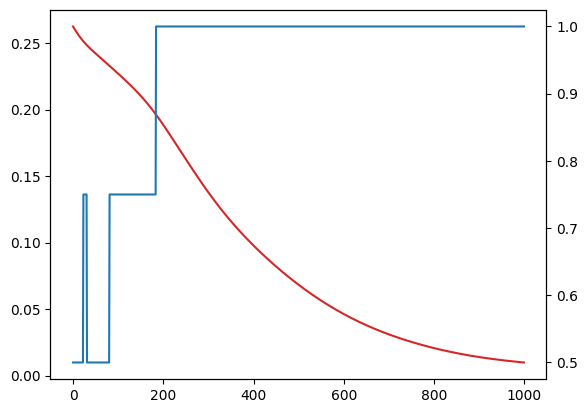

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, "tab:red")
ax2 = ax1.twinx()
ax2.plot(accuracy_list, "tab:blue")

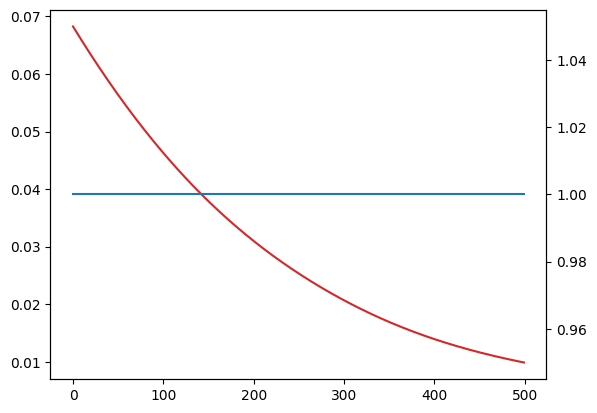

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list[-500:], "tab:red")
ax2 = ax1.twinx()
ax2.plot(accuracy_list[-500:], "tab:blue")